In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stat
import numpy as np


In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# df['price'] = df['price'] * 82.62

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
cut_map = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5,}
color_map = {'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1,}
clarity_map = {'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1,}
df = df.replace({'cut':cut_map,'color':color_map,'clarity':clarity_map})
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

<AxesSubplot: >

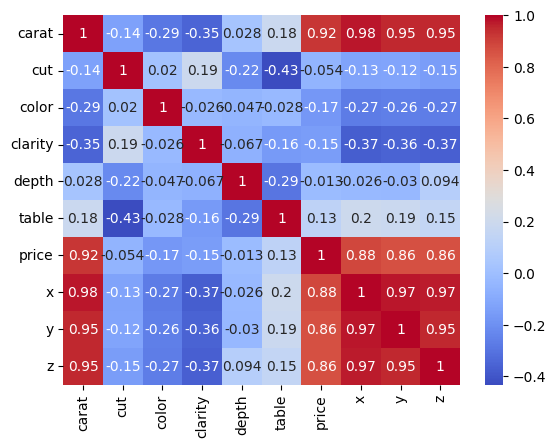

In [7]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

Importing modules required especially for Regression modelling

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import sys

Selecting Parameters and splitting data

In [110]:
x = df[['carat','cut','table','clarity','color','x','y','z']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)


loops and testing

Defining polynomial features transformer

In [111]:
pr = PolynomialFeatures(degree = 3, include_bias = False)

Creating input list that will define the pipeline

In [112]:
Input=[('scale',StandardScaler()), ('polynomial', pr), ('model',Ridge(alpha=100))]
pipe = Pipeline(Input)

Converting transformed polynomial values to float to fit in pipeline

In [113]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', Ridge(alpha=100))])

Prediction

In [114]:
ypipe = pd.DataFrame(pipe.predict(x_test), columns=['price'])

<AxesSubplot: xlabel='price', ylabel='Density'>

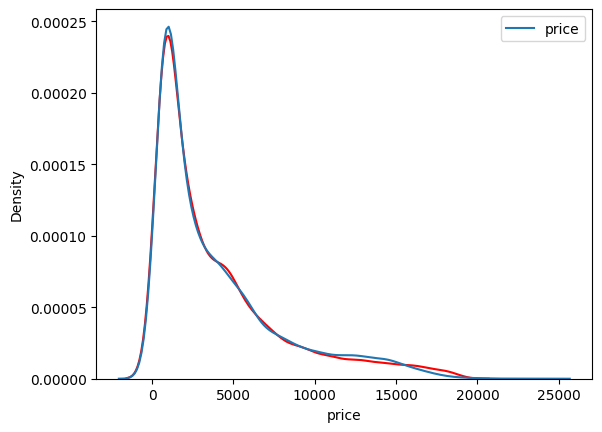

In [115]:
ax1 = sns.kdeplot(y_test, color = 'r', label = 'Actual Value')
sns.kdeplot(ypipe, color = 'b', label = 'Fitted Value', ax = ax1)

In [116]:
r2 = r2_score(y_test, ypipe)
mse = mean_squared_error(y_test, ypipe)
r2,mse

(0.9753779662633847, 390851.6095251341)

In [117]:
joblib.dump(pipe,'polynomialDiamond.joblib')
loaded = joblib.load('polynomialDiamond.joblib')
ypred = loaded.predict(x_test)

['polynomialDiamond.joblib']

In [118]:
loaded = joblib.load('polynomialDiamond.joblib')
ypipe = loaded.predict(x_test)

<AxesSubplot: xlabel='price', ylabel='Density'>

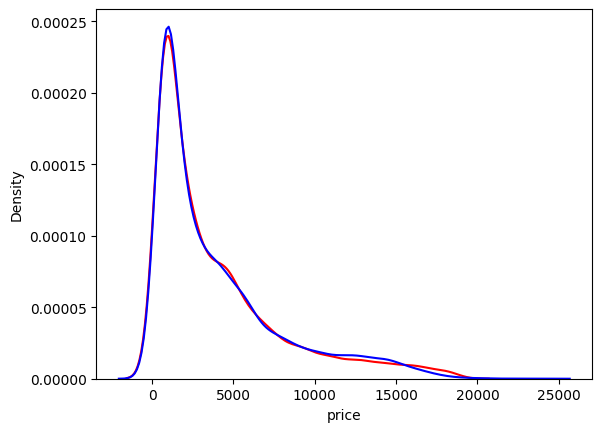

In [119]:
ax1 = sns.kdeplot(y_test, color = 'r', label = 'Actual Value')
sns.kdeplot(ypipe, color = 'b', label = 'Fitted Value', ax = ax1)

In [120]:
for i in df.columns:
    print(i + ':min is {}'.format(df[i].min()))
    print(i + ':max is {}'.format(df[i].max()))

carat:min is 0.2
carat:max is 5.01
cut:min is 1
cut:max is 5
color:min is 1
color:max is 7
clarity:min is 1
clarity:max is 8
depth:min is 43.0
depth:max is 79.0
table:min is 43.0
table:max is 95.0
price:min is 326
price:max is 18823
x:min is 0.0
x:max is 10.74
y:min is 0.0
y:max is 58.9
z:min is 0.0
z:max is 31.8


In [121]:
ypipe.min(),ypipe.max()

(-178.69361123116505, 23813.525811016778)